# Exploratory Data Analysis

## Summary:

## Import packages and load data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

# data directory
DATA_DIR = os.path.join('data')

In [2]:
data_paths_hhold = {'A': {'train': os.path.join(DATA_DIR, 'A_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'A_hhold_test.csv')}, 
              
              'B': {'train': os.path.join(DATA_DIR, 'B_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'B_hhold_test.csv')}, 
              
              'C': {'train': os.path.join(DATA_DIR, 'C_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'C_hhold_test.csv')}}

data_paths_indiv = {'A': {'train': os.path.join(DATA_DIR, 'A_indiv_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'A_indiv_test.csv')}, 
              
              'B': {'train': os.path.join(DATA_DIR, 'B_indiv_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'B_indiv_test.csv')}, 
              
              'C': {'train': os.path.join(DATA_DIR, 'C_indiv_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'C_indiv_test.csv')}}

In [3]:
# load data
a_hhold_train = pd.read_csv(data_paths_hhold['A']['train'], index_col='id')
b_hhold_train = pd.read_csv(data_paths_hhold['B']['train'], index_col='id')
c_hhold_train = pd.read_csv(data_paths_hhold['C']['train'], index_col='id')

a_hhold_test = pd.read_csv(data_paths_hhold['A']['test'], index_col='id')
b_hhold_test = pd.read_csv(data_paths_hhold['B']['test'], index_col='id')
c_hhold_test = pd.read_csv(data_paths_hhold['C']['test'], index_col='id')

a_indiv_train = pd.read_csv(data_paths_indiv['A']['train'], index_col='id')
b_indiv_train = pd.read_csv(data_paths_indiv['B']['train'], index_col='id')
c_indiv_train = pd.read_csv(data_paths_indiv['C']['train'], index_col='id')

a_indiv_test = pd.read_csv(data_paths_indiv['A']['test'], index_col='id')
b_indiv_test = pd.read_csv(data_paths_indiv['B']['test'], index_col='id')
c_indiv_test = pd.read_csv(data_paths_indiv['C']['test'], index_col='id')

datasets = [a_hhold_train, a_indiv_train, a_hhold_test, a_indiv_test, b_hhold_train, b_indiv_train, b_hhold_test, b_indiv_test, c_hhold_train, c_indiv_train, c_hhold_test, c_indiv_test]

In [4]:
# Variables for preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

## Missing data

### Global analysis

We need to check if the datasets contain missing data.

In [5]:
null_rows_per_null_columns = [[d[c].isnull().values.sum() for c in d.columns[d.isnull().any()].tolist()] for d in datasets]

missing_data = {#'Contains missing data': [d.isnull().values.any() for d in datasets],
               'Columns with missing features': [d.isnull().values.any(axis=0).sum() for d in datasets],
               'Columns': [d.shape[1] for d in datasets],
               'Total rows': [d.shape[0] for d in datasets],
               'Mean % nulls': [0 if len(col_nulls) == 0 else np.mean(col_nulls)/d.shape[0] for (d, col_nulls) in zip(datasets, null_rows_per_null_columns)]}

missing_data = pd.DataFrame(missing_data, index=["a_hhold_train",
                                                "a_indiv_train",
                                                "a_hhold_test",
                                                "a_indiv_test",
                                                "b_hhold_train",
                                                "b_indiv_train",
                                                "b_hhold_test",
                                                "b_indiv_test",
                                                "c_hhold_train",
                                                "c_indiv_train",
                                                "c_hhold_test",
                                                "c_indiv_test"])

missing_data

,Columns,Columns with missing features,Mean % nulls,Total rows
a_hhold_train,345,0,0.000000,8203
a_indiv_train,43,1,0.166880,37560
a_hhold_test,344,0,0.000000,4041
a_indiv_test,42,1,0.165255,18535
b_hhold_train,442,9,0.572931,3255
b_indiv_train,226,28,0.813452,20252
b_hhold_test,441,9,0.571834,1604
b_indiv_test,225,28,0.815713,10066
c_hhold_train,164,0,0.000000,6469
c_indiv_train,43,0,0.000000,29913


### Analysis for `b_hhold_train` and `b_hhold_test`

We first check if the columns containing missing data are the same for both datasets.

In [6]:
nb_rows_b_hhold_train, nb_columns_b_hhold_train = b_hhold_train.shape

In [7]:
print("Are the columns containing missing values in b_hhold_train and b_hhold_test the same ?")
print(list(b_hhold_train.columns[b_hhold_train.isnull().any()])
      == list(b_hhold_test.columns[b_hhold_test.isnull().any()]))

missing_columns = ['FGWqGkmD', 'BXOWgPgL', 'umkFMfvA', 'McFBIGsm',
                    'IrxBnWxE', 'BRzuVmyf','dnlnKrAg', 'aAufyreG',
                    'OSmfjCbE']

nb_missing_data_b_hhold_train = b_hhold_train[missing_columns].isnull().sum()
missing_b_hhold_train = {"Number of missing values": nb_missing_data_b_hhold_train,
                         "Percentage of missing data": [x / nb_rows_b_hhold_train * 100 for x in nb_missing_data_b_hhold_train], 
                         "Type of data": b_hhold_train[missing_columns].dtypes}

pd.DataFrame(missing_b_hhold_train, index=missing_columns).sort_values('Number of missing values', ascending=False)

Are the columns containing missing values in b_hhold_train and b_hhold_test the same ?
True


,Number of missing values,Percentage of missing data,Type of data
IrxBnWxE,2983,91.643625,float64
dnlnKrAg,2723,83.655914,float64
FGWqGkmD,2653,81.505376,float64
umkFMfvA,2365,72.657450,float64
aAufyreG,2346,72.073733,float64
BRzuVmyf,1461,44.884793,float64
BXOWgPgL,751,23.072197,float64
McFBIGsm,751,23.072197,float64
OSmfjCbE,751,23.072197,float64


All the data are numerical.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb43682d208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb43423b940>]], dtype=object)

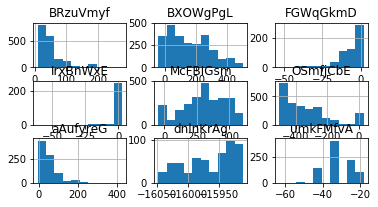

In [8]:
b_hhold_train.hist(column=missing_columns, layout=(4,3))

#### Analysis of the column `IrxBnWxE`

Wide range of values for those columns, except for `IrxBnWxE`, which has 91.6 % of missing data.  
Let's investigate this column.

In [9]:
b_hhold_train['IrxBnWxE'].unique()

array([ nan,   3., -37., -13.,  -5., -21., -45., -61., -29.])

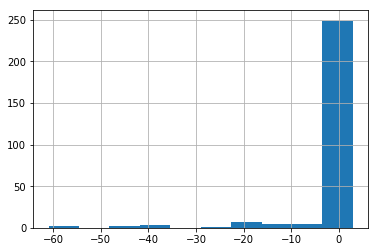

In [10]:
b_hhold_train['IrxBnWxE'].hist()

In [11]:
x = b_hhold_train[['IrxBnWxE']].dropna().values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
print("Variance of the column (train set):", x_scaled.var())

x = b_hhold_test[['IrxBnWxE']].dropna().values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
print("Variance of the column (test set):", x_scaled.var())

Variance of the column (train set): 0.0201327314014
Variance of the column (test set): 0.0335875184744


Very small variance : Variance < 0.05.  
We remove this column.

In [12]:
b_hhold_train = b_hhold_train.drop('IrxBnWxE', 1)
b_hhold_test = b_hhold_test.drop('IrxBnWxE', 1)

#### Analysis of the columns `BXOWgPgL`, `McFBIGsm`, `OSmfjCbE`

We can notice that those three columns contain exactly the same number of missing data. Let's check if the data for those columns are missing for the same indexes.

In [13]:
print(False in b_hhold_train['BXOWgPgL'].dropna().index == b_hhold_train['McFBIGsm'].dropna().index)
print(False in b_hhold_train['BXOWgPgL'].dropna().index == b_hhold_train['OSmfjCbE'].dropna().index)

False
False


The data is missing for the same indexes for each column. It could reveal some correlation between those columns, we need to check this.

##### Linear correlation:

In [14]:
b_hhold_train[['BXOWgPgL', 'McFBIGsm', 'OSmfjCbE']].dropna().corr(method='pearson')

,BXOWgPgL,McFBIGsm,OSmfjCbE
BXOWgPgL,1.000000,0.689809,-0.424017
McFBIGsm,0.689809,1.000000,-0.624651
OSmfjCbE,-0.424017,-0.624651,1.000000


##### Monotonic association

In [15]:
b_hhold_train[['BXOWgPgL', 'McFBIGsm', 'OSmfjCbE']].dropna().corr(method='spearman')

,BXOWgPgL,McFBIGsm,OSmfjCbE
BXOWgPgL,1.000000,0.715156,-0.479523
McFBIGsm,0.715156,1.000000,-0.673360
OSmfjCbE,-0.479523,-0.673360,1.000000


`BXOWgPgL` and `McFBIGsm` are slightly positively correlated, but not enough to decide to remove one or several of them.

In [16]:
x = b_hhold_train[['OSmfjCbE']].dropna().values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
print("Variance of the column (train set):", x_scaled.var())

x = b_hhold_test[['OSmfjCbE']].dropna().values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
print("Variance of the column (test set):", x_scaled.var())

Variance of the column (train set): 0.0749180492588
Variance of the column (test set): 0.0791064431259


## Shared features across countries

In [17]:
dataset_pairs = [(a_hhold_test, b_hhold_test), (a_hhold_test, c_hhold_test), (b_hhold_test, c_hhold_test), (a_indiv_test, b_indiv_test), (a_indiv_test, c_indiv_test), (b_indiv_test, c_indiv_test)]
common_features = {'Common features': [len(set(d1.columns).intersection(set(d2.columns))) for d1, d2 in dataset_pairs],
                   'Features d1': [d.shape[1] for d, _ in dataset_pairs],
                   'Features d2': [d.shape[1] for _, d in dataset_pairs]}
common_features = pd.DataFrame(common_features, index=["a_b_hhold",
                                                       "a_c_hhold",
                                                       "b_c_hhold",
                                                       "a_b_indiv",
                                                       "a_c_indiv",
                                                       "b_c_indiv"])
common_features

,Common features,Features d1,Features d2
a_b_hhold,1,344,440
a_c_hhold,7,344,163
b_c_hhold,1,440,163
a_b_indiv,2,42,225
a_c_indiv,3,42,42
b_c_indiv,2,225,42


It seems more interesting to train separate models for each country.  
We can then remove the `country` column as it no longer adds information to a model specificly trained for a country (variance = 0).

In [18]:
a_hhold_train = a_hhold_train.drop('country', 1)
a_hhold_test = a_hhold_test.drop('country', 1)
b_hhold_train = b_hhold_train.drop('country', 1)
b_hhold_test = b_hhold_test.drop('country', 1)
c_hhold_train = c_hhold_train.drop('country', 1)
c_hhold_test = c_hhold_test.drop('country', 1)